"""
Luminosity function code on toy data
------------------------------------
Figure 4.9.

An example of using Lynden-Bell's C- method to estimate a bivariate
distribution from a truncated sample. The lines in the left panel show the true
one-dimensional distributions of x and y (truncated Gaussian distributions).
The two-dimensional distribution is assumed to be separable; see eq. 4.85.
A realization of the distribution is shown in the right panel, with a
truncation given by the solid line. The points in the left panel are computed
from the truncated data set using the C- method, with error bars from 20
bootstrap resamples.
"""


In [41]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.lumfunc import bootstrap_Cminus

In [42]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [43]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [44]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [45]:
# to enlarge the sizes
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Define and sample our distributions

In [46]:
#------------------------------------------------------------
# Define and sample our distributions
N = 10000
np.random.seed(42)

# Define the input distributions for x and y
x_pdf = stats.truncnorm(-2, 1, 0.66666, 0.33333)
y_pdf = stats.truncnorm(-1, 2, 0.33333, 0.33333)

x = x_pdf.rvs(N)
y = y_pdf.rvs(N)

# define the truncation: we'll design this to be symmetric
# so that xmax(y) = max_func(y)
# and ymax(x) = max_func(x)
max_func = lambda t: 1. / (0.5 + t) - 0.5

xmax = max_func(y)
xmax[xmax > 1] = 1  # cutoff at x=1

ymax = max_func(x)
ymax[ymax > 1] = 1  # cutoff at y=1

# truncate the data
flag = (x < xmax) & (y < ymax)
x = x[flag]
y = y[flag]
xmax = xmax[flag]
ymax = ymax[flag]

Text(0.5, 1.0, ' Y Distribution')

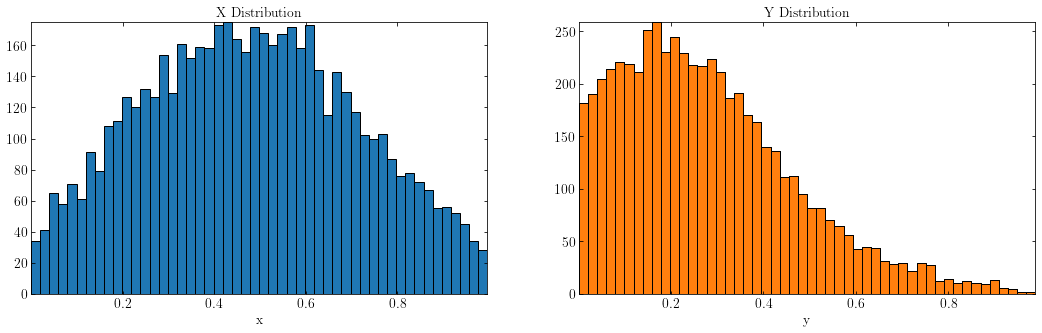

In [59]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(121)
ax.hist(x,bins=50);
ax.set_xlabel("x")
ax.set_title(" X Distribution")
ax = fig.add_subplot(122)
ax.hist(y,bins=50);
ax.hist(y,bins=50);
ax.set_xlabel("y")
ax.set_title(" Y Distribution")

Text(0.5, 1.0, 'y vs x')

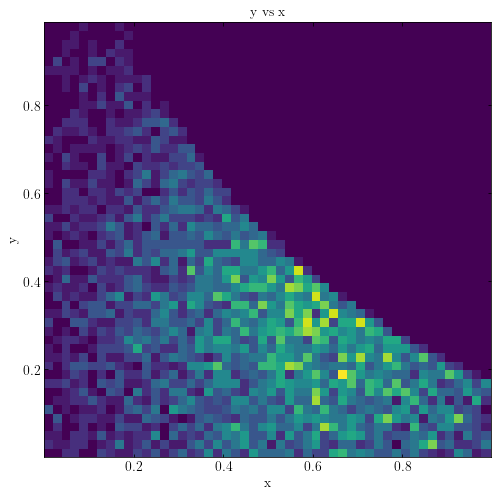

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
h=ax.hist2d(x,y,bins=(50,50));
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y vs x")
#fig.colorbar(h[0], cax=ax, orientation='horizontal')

In [49]:
x_fit = np.linspace(0, 1, 21)
y_fit = np.linspace(0, 1, 21)

# compute the Cminus distributions (with bootstrap)

In [50]:
#------------------------------------------------------------
# compute the Cminus distributions (with bootstrap)
x_dist, dx_dist, y_dist, dy_dist = bootstrap_Cminus(x, y, xmax, ymax,
                                                    x_fit, y_fit,
                                                    Nbootstraps=20,
                                                    normalize=True)

x_mid = 0.5 * (x_fit[1:] + x_fit[:-1])
y_mid = 0.5 * (y_fit[1:] + y_fit[:-1])

# Plot the results

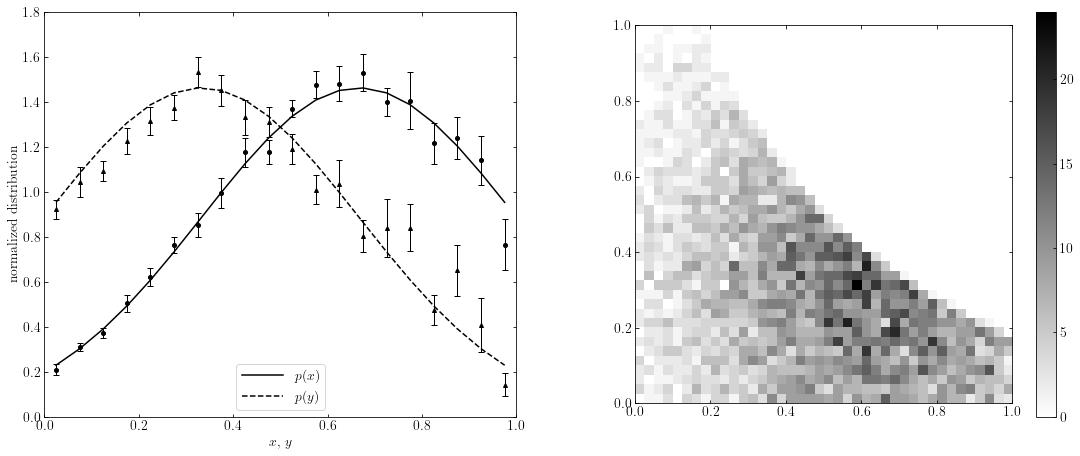

In [51]:
# Plot the results
#fig = plt.figure(figsize=(5, 2))
fig = plt.figure(figsize=(18, 7.5))
fig.subplots_adjust(bottom=0.2, top=0.95,
                    left=0.1, right=0.92, wspace=0.25)

# First subplot is the true & inferred 1D distributions
ax = fig.add_subplot(121)
ax.plot(x_mid, x_pdf.pdf(x_mid), '-k', label='$p(x)$')
ax.plot(y_mid, y_pdf.pdf(y_mid), '--k', label='$p(y)$')
ax.legend(loc='lower center')

ax.errorbar(x_mid, x_dist, dx_dist, fmt='ok', ecolor='k', lw=1, ms=4)
ax.errorbar(y_mid, y_dist, dy_dist, fmt='^k', ecolor='k', lw=1, ms=4)

ax.set_ylim(0, 1.8)
ax.set_xlim(0, 1)
ax.set_xlabel('$x$, $y$')
ax.set_ylabel('normalized distribution')

# Second subplot is the "observed" 2D distribution

ax = fig.add_subplot(122)
H, xb, yb = np.histogram2d(x, y, bins=np.linspace(0, 1, 41))
plt.imshow(H.T, origin='lower', interpolation='nearest',
           extent=[0, 1, 0, 1], cmap=plt.cm.binary)
cb = plt.colorbar()
